# **Stock Price Prediction Using Machine Learning**

 By using artificail recurrent neural network, specifically Long Short Term Memoru (LSTM) we are trynig to predict the closing stock price of Tesla (TSLA) using past 60 days stock Price

first we pip install yfinance to fetch historiacl stock prices of Tesla corp. of about 3.5 years

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 23.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [21]:
#importing libraries
import yfinance as yf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [22]:
#Fetching Stock quote
df = yf.download('TSLA', start='2019-01-01', end='2022-07-28')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000
2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000
2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500
2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000
2019-01-08,68.391998,68.802002,65.403999,67.070000,67.070000,35042500
...,...,...,...,...,...,...
2022-07-21,765.320007,819.799988,764.599976,815.119995,815.119995,47344100
2022-07-22,828.659973,842.359985,812.140015,816.729980,816.729980,34421200
2022-07-25,816.650024,822.440002,802.200012,805.299988,805.299988,21357800


It is noticable there are some missing dates, like 2019-01-05,06 and many more. This is because, the stock market dose not run on weekends.

In [23]:
df.shape

(899, 6)

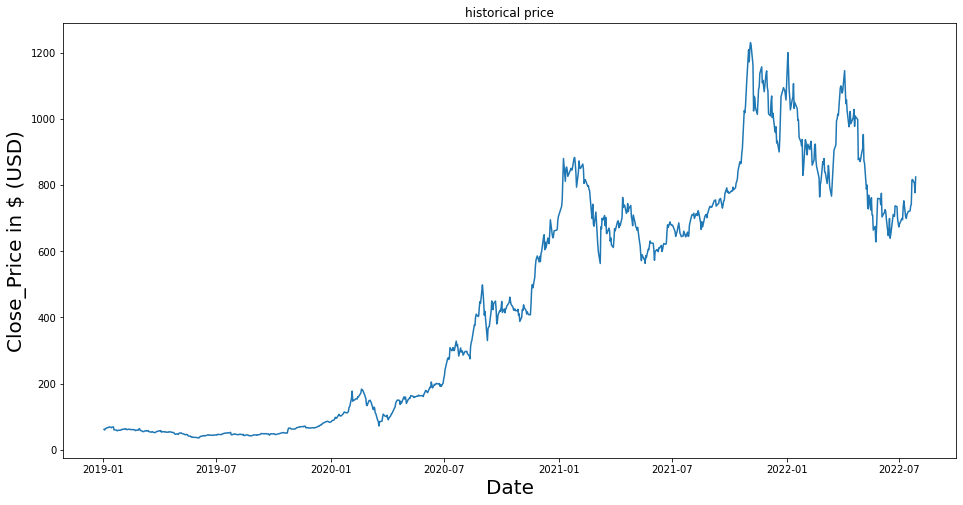

In [24]:
# Visualizing the closing price of the stock in 2D plot of every observation
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close_Price in $ (USD)', fontsize=20)
plt.show()

In [25]:
#Creating Close Colume DataFrame and converting that into nump array
data = df.filter(['Close'])
df = np.array(data).reshape(-1,1)
df

array([[  62.02399826],
       [  60.0719986 ],
       [  63.5379982 ],
       [  66.99199677],
       [  67.06999969],
       [  67.70600128],
       [  68.9940033 ],
       [  69.45200348],
       [  66.87999725],
       [  68.88600159],
       [  69.20999908],
       [  69.46199799],
       [  60.45199966],
       [  59.7840004 ],
       [  57.51800156],
       [  58.30199814],
       [  59.40800095],
       [  59.27600098],
       [  59.49200058],
       [  61.75400162],
       [  61.40399933],
       [  62.44200134],
       [  62.57799911],
       [  64.26999664],
       [  63.44400024],
       [  61.5019989 ],
       [  61.15999985],
       [  62.56800079],
       [  62.36199951],
       [  61.63399887],
       [  60.75400162],
       [  61.57600021],
       [  61.12799835],
       [  60.51200104],
       [  58.24599838],
       [  58.94200134],
       [  59.75400162],
       [  59.5719986 ],
       [  62.94800186],
       [  63.97600174],
       [  58.95800018],
       [  57.071

In [26]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1,1))
scaled_df

array([[0.02196604],
       [0.02033136],
       [0.02323392],
       [0.02612644],
       [0.02619176],
       [0.02672437],
       [0.027803  ],
       [0.02818654],
       [0.02603264],
       [0.02771255],
       [0.02798388],
       [0.02819491],
       [0.02064959],
       [0.02009018],
       [0.01819254],
       [0.01884909],
       [0.0197753 ],
       [0.01966476],
       [0.01984564],
       [0.02173993],
       [0.02144683],
       [0.02231609],
       [0.02242998],
       [0.02384693],
       [0.0231552 ],
       [0.0215289 ],
       [0.02124249],
       [0.02242161],
       [0.02224909],
       [0.02163944],
       [0.02090249],
       [0.02159087],
       [0.02121569],
       [0.02069983],
       [0.01880219],
       [0.01938505],
       [0.02006505],
       [0.01991264],
       [0.02273984],
       [0.02360072],
       [0.01939845],
       [0.01781904],
       [0.0163418 ],
       [0.01629155],
       [0.01635017],
       [0.0176147 ],
       [0.01875027],
       [0.017

Scaling or normalization of input data before presenting to nural network 

In [27]:
# Get the number of rows to train the modle on
scaled_df
training_data_len = math.ceil(len(scaled_df)*0.8)
training_data_len

720

In [28]:
#Creating the trainig data set and scale the same
train_data = scaled_df[0:training_data_len , :]
x_train = []
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 30:
        print(x_train)
        print(y_train)
        print()

[array([0.02196604, 0.02033136, 0.02323392, 0.02612644, 0.02619176,
       0.02672437, 0.027803  , 0.02818654, 0.02603264, 0.02771255,
       0.02798388, 0.02819491, 0.02064959, 0.02009018, 0.01819254,
       0.01884909, 0.0197753 , 0.01966476, 0.01984564, 0.02173993,
       0.02144683, 0.02231609, 0.02242998, 0.02384693, 0.0231552 ,
       0.0215289 , 0.02124249, 0.02242161, 0.02224909, 0.02163944])]
[0.020902493692352912]



In [29]:
# converting the x_train and y_train to numpy array and reshaping them
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(690, 30, 1)

2 layre LSTM model with two 50 neauron
and 2 layre Dense model with 25 and 1 neauron

In [30]:
# Bulding the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))   
model.add(Dense(25))
model.add(Dense(1))

Optimizer for improve loss function which is used to measure the performance of the model

In [31]:
# Compiling and training the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=40, epochs=20)

Epoch 1/20
18/18 [==============================] - 4s 31ms/step - loss: 0.0300
Epoch 2/20
18/18 [==============================] - 1s 31ms/step - loss: 0.0029
Epoch 3/20
18/18 [==============================] - 1s 31ms/step - loss: 0.0015
Epoch 4/20
18/18 [==============================] - 1s 32ms/step - loss: 0.0013
Epoch 5/20
18/18 [==============================] - 1s 30ms/step - loss: 0.0013
Epoch 6/20
18/18 [==============================] - 1s 30ms/step - loss: 0.0013
Epoch 7/20
18/18 [==============================] - 1s 31ms/step - loss: 0.0013
Epoch 8/20
18/18 [==============================] - 1s 31ms/step - loss: 0.0012
Epoch 9/20
18/18 [==============================] - 1s 31ms/step - loss: 0.0011
Epoch 10/20
18/18 [==============================] - 1s 32ms/step - loss: 0.0010
Epoch 11/20
18/18 [==============================] - 1s 30ms/step - loss: 0.0013
Epoch 12/20
18/18 [==============================] - 1s 31ms/step - loss: 0.0011
Epoch 13/20
18/18 [==================

In [32]:
# Creaiting the testing data set
test_data = scaled_df[training_data_len - 30: , :]
x_test = []
y_test = df[training_data_len: , :]
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [33]:
# Converting the data into numpy array and reshaping
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [34]:
# model for price prediction
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Evaluaitng the model using root mean squared error (rmse)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

6.435925702142982

lower the rmse means the model preforemed a very decent job in predecting. which means lower the vaule of rmse the more accurate is the prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


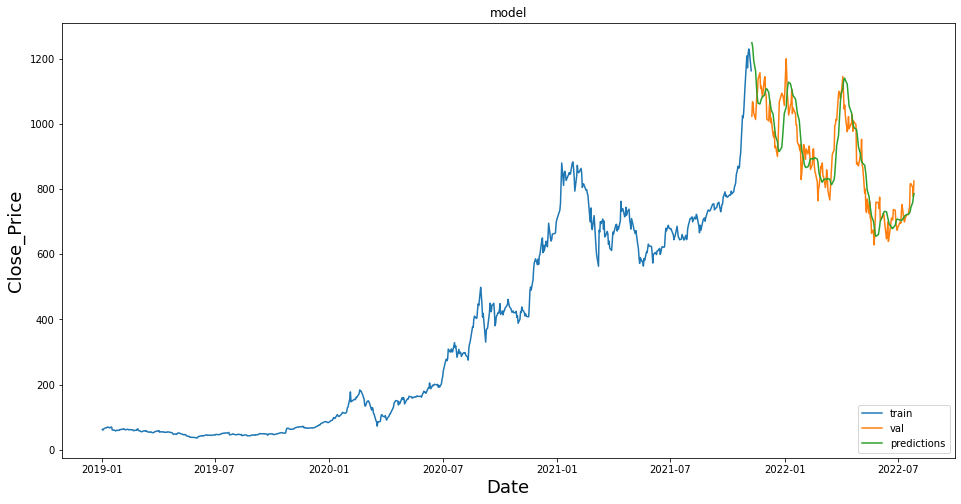

In [35]:
#Ploting the data
train = data[:training_data_len]
val = data[training_data_len:]
val['predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price in $ (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close','predictions']],)
plt.legend(['train', 'val', 'predictions'], loc = 'lower right')
plt.show()

In [36]:
# valid stock price and predicted stock price
val

,Close,predictions
Date,,
2021-11-09,1023.500000,1249.147217
2021-11-10,1067.949951,1240.074829
2021-11-11,1063.510010,1220.252075
2021-11-12,1033.420044,1193.783691
2021-11-15,1013.390015,1161.678589
...,...,...
2022-07-21,815.119995,731.449829
2022-07-22,816.729980,743.087402
2022-07-25,805.299988,758.531799


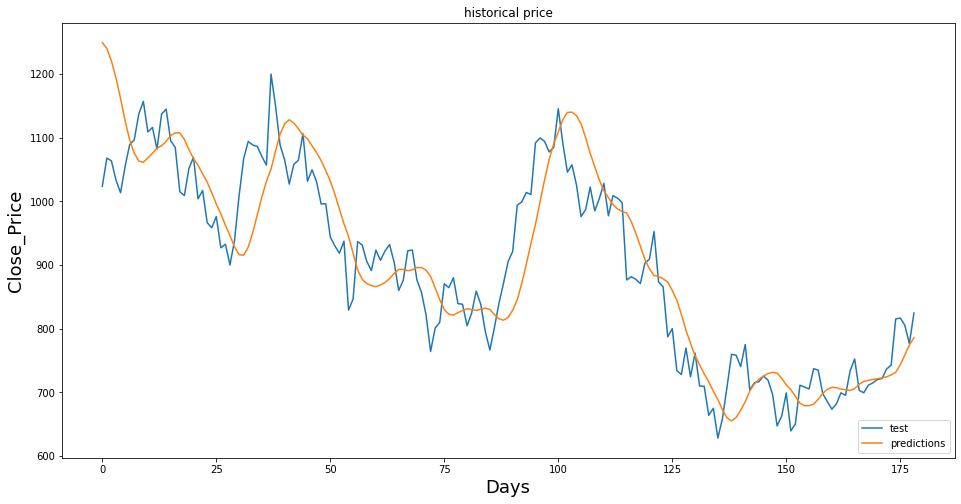

In [37]:
#Visualization of pridicted and actual price
test = df[training_data_len:]
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(test)
plt.plot(predictions)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'lower right')
plt.show()

Predicting the cost of Tesla stock on date 2022-July-27

In [38]:
# get the quote
Tesla_quote = yf.download('TSLA', start='2019-01-01', end='2022-07-27')
# Creat a new dataframe
nw_df = Tesla_quote.filter(['Close'])
#Get the last 30 days closing price value and convert the dataframe to an array 
last_30_days = nw_df[-30:].values
#Scale the data to be values between 0 and 1
last_30_days_scaled = scaler.transform(last_30_days)
#Creat an empty list
X_test = []
#Append the past 30 days
X_test.append(last_30_days_scaled)
#Convert the X_test data set to a nuppy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[785.7153]]


Acctual cost of Tesla stock on date 2022-July-27

In [39]:
Tesla_quote1 = yf.download('TSLA', start='2022-07-26', end='2022-07-27')
Tesla_quote1['Close']

[*********************100%***********************]  1 of 1 completed


Date
2022-07-26    776.580017
Name: Close, dtype: float64

**Conclusion:**
  we observed that the model performed conciderable well in the with some deviation in the price, as we see at the last part.
  

Predicted stock value : 785.7153


Actual Stock value    :776.580017

Our model made a pridiction of todays stock price which has a difference of around +9.13.